<a href="https://colab.research.google.com/github/Ibraheem101/mlops/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [1]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SEED = 1234
NUM_SAMPLES = 100

In [3]:
np.random.seed(SEED)

In [4]:
# Generate data
def generate_data(n):
  X = np.linspace(0, 99, 100)
  random_noise = np.random.uniform(-10, 20, size = n)
  y = 5 * X + random_noise
  return X, y

In [5]:
X, y = generate_data(n = NUM_SAMPLES)
data = np.vstack([X, y]).T
print(data[:10])

[[ 0.         -4.25441649]
 [ 1.         13.66326313]
 [ 2.         13.13183217]
 [ 3.         28.56075751]
 [ 4.         33.39927424]
 [ 5.         23.17777816]
 [ 6.         28.29392765]
 [ 7.         49.05616533]
 [ 8.         58.74418061]
 [ 9.         61.27797904]]


In [6]:
# Load into a dataframe
df = pd.DataFrame(data, columns = ['X', 'y'])
X = df.X.values
y = df.y.values

In [7]:
df.head()

,X,y
0,0.0,-4.254416
1,1.0,13.663263
2,2.0,13.131832
3,3.0,28.560758
4,4.0,33.399274


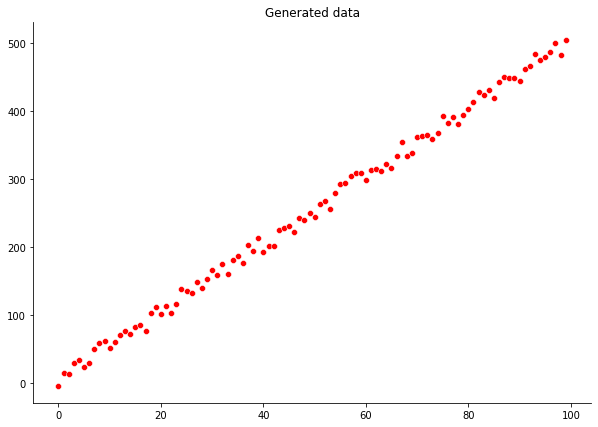

In [8]:
plt.figure(figsize = (10, 7))
plt.title("Generated data")
sns.scatterplot(data = df, x = X, y = y, color = 'r', )
sns.despine()

### Splitting Data

In [9]:
train_size = 0.7
test_size = 0.15
val_size = 0.15

In [10]:
indices = np.arange(NUM_SAMPLES)
np.random.shuffle(indices)

In [11]:
X = X[indices]
y = y[indices]

In [12]:
len(X[85:])

15

In [13]:
# X_train = X[:70]
# y_train = y[:70]

# X_test = X[70:85]
# y_test = y[70:85]

# X_val = X[85:]
# y_val = y[85:]

In [14]:
train_end = int(train_size * NUM_SAMPLES)
test_start = train_end
test_end = int((train_size + test_size)*NUM_SAMPLES)
val_start = test_end

print(f"Train end: {train_end}")
print(f"Test start: {test_start}")
print(f"Test end: {test_end}")

Train end: 70
Test start: 70
Test end: 85


In [16]:
X_train = X[:train_end]
y_train = y[:train_end]

X_test = X[test_start:test_end]
y_test = y[test_start:test_end]

X_val = X[val_start:]
y_val = y[val_start:]

In [17]:
print(len(X_train), len(X_test), len(X_val))

70 15 15


In [18]:
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")

X_train: (70,), y_train: (70,)
X_test: (15,), y_test: (15,)
X_val: (15,), y_test: (15,)


### Standardize Data

In [27]:
# Standardize to mean of zero and S.D of 1
def Standardize(data, mean, std):
  z = (data - mean)/std
  return z

In [29]:
# Fit on training data and transform on test and val data
X_mean = np.mean(X_train)
X_std = np.std(X_train)

y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [30]:
X_train_scaled = Standardize(X_train, X_mean, X_std)
y_train_scaled = Standardize(y_train, y_mean, y_std)

X_test_scaled = Standardize(X_test, X_mean, X_std)
y_test_scaled = Standardize(y_test, y_mean, y_std)

X_val_scaled = Standardize(X_val, X_mean, X_std)
y_val_scaled = Standardize(y_val, y_mean, y_std)

In [34]:
# Check (means should be ~0 and std should be ~1)
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test_scaled, axis=0):.1f}, std: {np.std(X_test_scaled, axis=0):.1f}")
print (f"mean: {np.mean(y_test_scaled, axis=0):.1f}, std: {np.std(y_test_scaled, axis=0):.1f}")

mean: -0.2, std: 1.0
mean: -0.2, std: 1.0
